In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from stop_dependence import depth_accuracy_regr_dependence, samples_split_accuracy_regr_dependence, \
impurity_accuracy_regression_dependence

In [2]:
data = pd.read_csv('datasets/nsw74psid1.csv')
del data["Unnamed: 0"]
y = data['re78']
X = data.loc[:, 'trt':'nodeg']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
# DecisionTreeRegression
# accuracy_dependence_train, accuracy_dependence_test = depth_accuracy_regr_dependence(X, y)
# plt.plot(accuracy_dependence_train, label='train', marker='.', markersize=10)
# plt.plot(accuracy_dependence_test, label='test', marker='.', markersize=10)

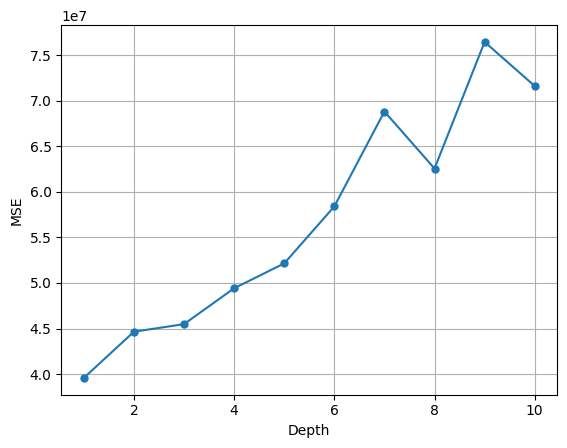

In [11]:
plt.plot(depth_accuracy_regr_dependence(X, y), label='test', marker='.', markersize=10)
plt.xlabel('Depth')
plt.ylabel('MSE')
# plt.legend()
plt.grid()
plt.show()

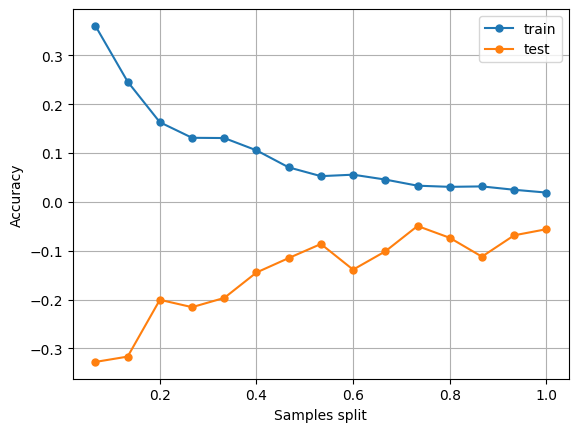

In [5]:
samples_split_dependence_train, samples_split_dependence_test = samples_split_accuracy_regr_dependence(X, y)
plt.plot(samples_split_dependence_train, label='train', marker='.', markersize=10)
plt.plot(samples_split_dependence_test, label='test', marker='.', markersize=10)
plt.xlabel('Samples split')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

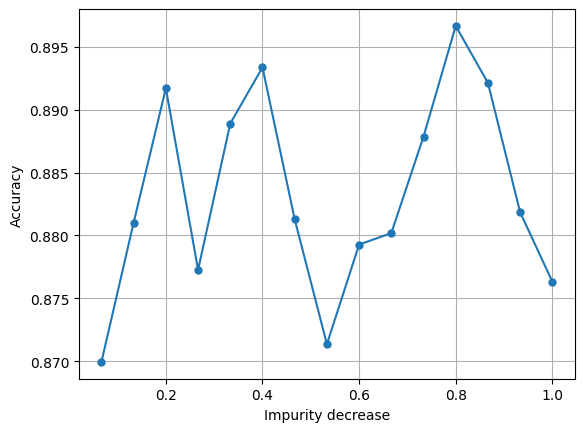

In [9]:
impurity_accuracy_dependence_train, impurity_accuracy_dependence_test = impurity_accuracy_regression_dependence(X, y)
plt.plot(impurity_accuracy_dependence_train, label='train', marker='.', markersize=10)
# plt.plot(impurity_accuracy_dependence_test, label='test', marker='.', markersize=10)
plt.xlabel('Impurity decrease')
plt.ylabel('Accuracy')
# plt.legend()
plt.grid()
plt.show()

In [7]:
# SupportVectorRegression
# Максимальное значение epsilon
max_epsilon = 40
# Число испытаний для каждого epsilon
test_count = 10
# Массив значений epsilon
epsilon_values = [1 * (1 - float(i) / max_epsilon) for i in range(max_epsilon)]
# Зависимость ошибки от epsilon
mse_dependence = Series(index=epsilon_values, dtype=float)
for epsilon in epsilon_values:
    mean_mse = 0.
    for _ in range(test_count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))
        regr = SVR(kernel='rbf', C=1, epsilon=epsilon)
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        mean_mse += mean_squared_error(y_test, y_pred) / test_count
    mse_dependence[epsilon] = mean_mse

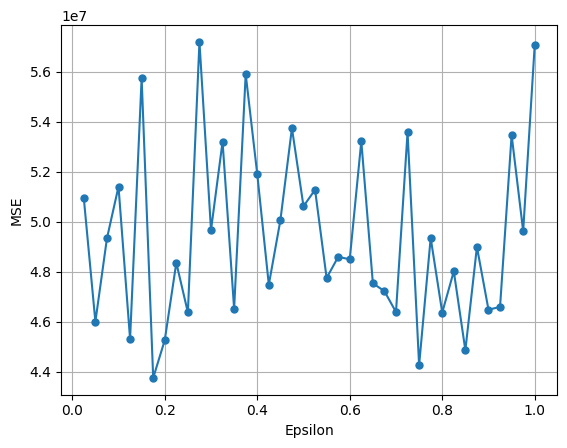

In [10]:
plt.plot(mse_dependence, label='mse', marker='.', markersize=10)
plt.xlabel('Epsilon')
plt.ylabel('MSE')
plt.grid()
plt.show()